In [1]:


df = _deepnote_execute_sql("""SELECT *
FROM 'data_assignment3.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df

,residue name,position,chain,phi,psi,cluster
0,LYS,10,A,-149.312855,142.657714,0
1,PRO,11,A,-44.283210,136.002076,0
2,LYS,12,A,-119.972621,-168.705263,1
3,LEU,13,A,-135.317212,137.143523,0
4,LEU,14,A,-104.851467,95.928520,0
...,...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562,0
29365,GLN,375,B,-117.428541,133.019506,0
29366,ILE,376,B,-113.586448,112.091970,0
29367,ASN,377,B,-100.668779,-12.102821,1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

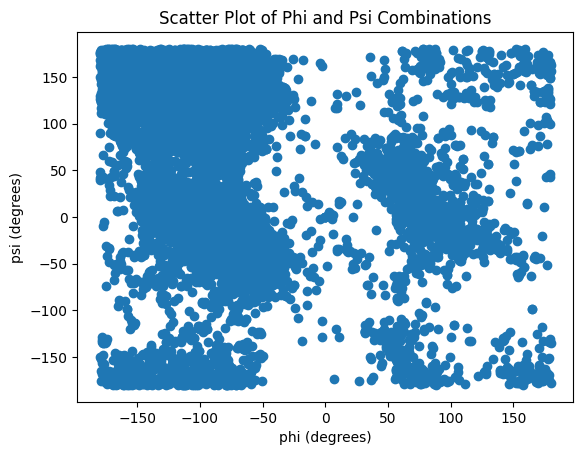

In [3]:

plt.scatter(df['phi'], df['psi'])
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
plt.title('Scatter Plot of Phi and Psi Combinations')
plt.show()

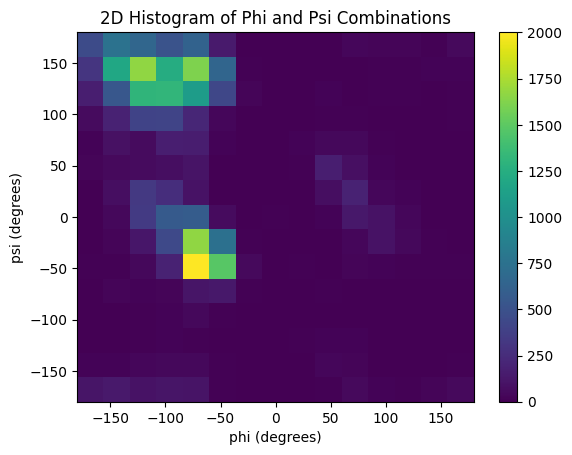

In [4]:
#Stugers Rule bins = log2(n) + 1
hist, xedges, yedges = np.histogram2d(df['phi'], df['psi'], bins=15)


plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
plt.title('2D Histogram of Phi and Psi Combinations')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

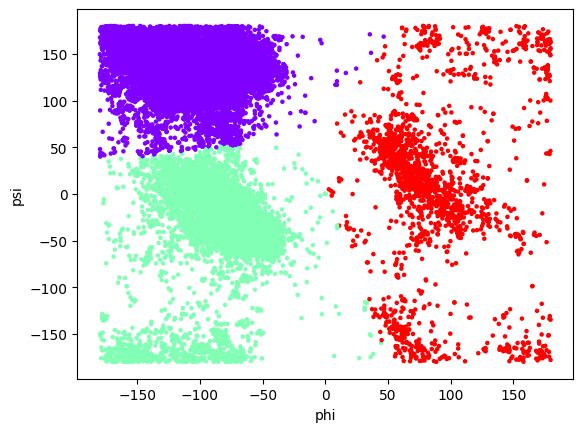

In [5]:
X = df[['phi', 'psi']].values

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(x=df['phi'], y=df['psi'], c = df['cluster'], cmap='rainbow', s = 5)
plt.rcParams['figure.figsize'] = (8,8)
plt.xlabel('phi')
plt.ylabel('psi')
plt.show

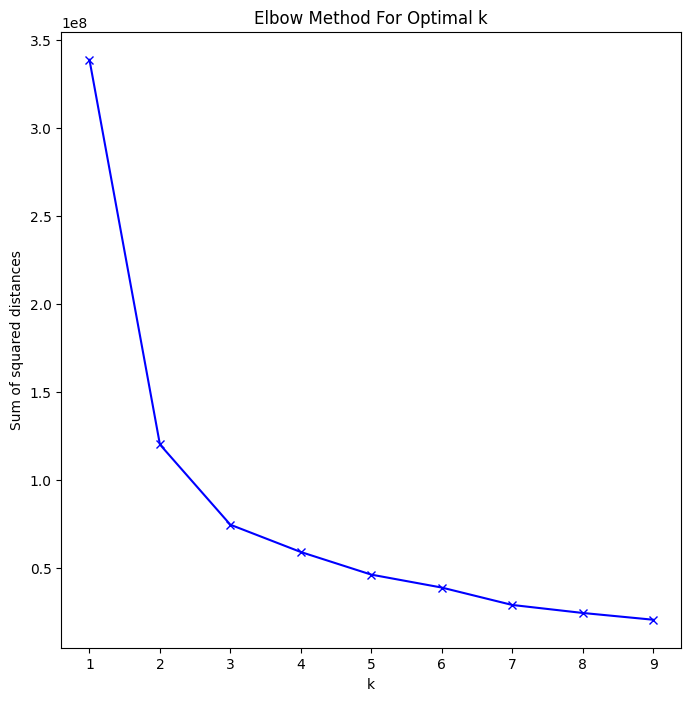

In [6]:
sum_of_squared_distances = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

In [7]:
silhouette_score = silhouette_score(X, df['cluster'])

Estimated number of clusters: 7
Estimated number of noise points: 524


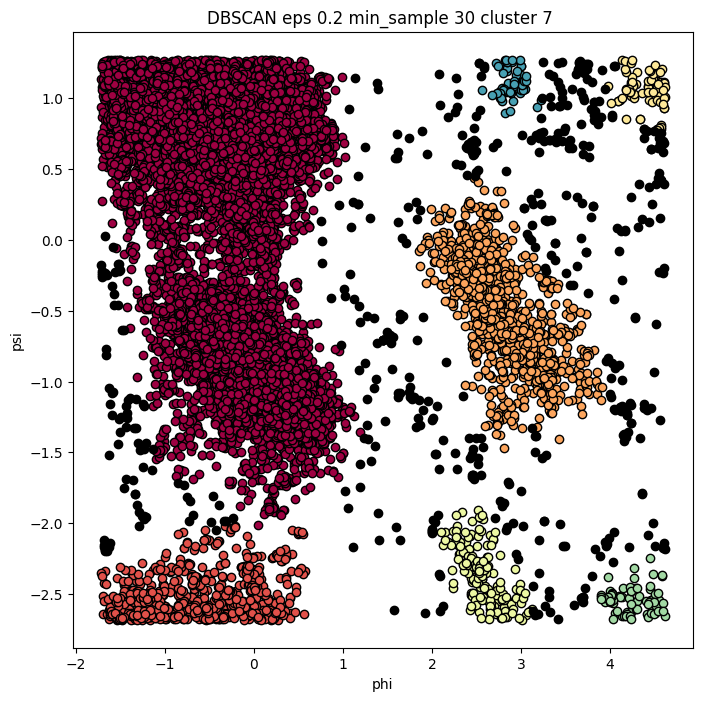

<Figure size 3000x3000 with 0 Axes>

In [21]:
X = df.loc[:, ["phi", "psi"]].values.reshape(-1, 2)
X = StandardScaler().fit_transform(X)
X_with_res = df.loc[:, ["residue name", "phi", "psi"]].values.reshape(-1, 3)
X_outliers_clsuter = []

eps=0.20
min_samples=30
db = DBSCAN(eps = eps, min_samples=min_samples).fit(X)
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
 

unique_labels = set(labels)
####
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors): 
    if k == -1:
        #continue
        # Black used for noise.
        col = [0, 0, 0, 1]
        
        xy = X_with_res[class_member_mask & core_samples_mask]
        X_outliers_clsuter.append(xy)
 

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
    markeredgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
    markeredgecolor='k')

plt.title('DBSCAN eps {} min_sample {} cluster {} '.format(eps, min_samples, n_clusters_))
plt.xlabel('phi')
plt.ylabel('psi')
plt.figure().set_size_inches(30, 30, forward=True)
plt.show()
   



In [9]:
X_outliers_clsuter
noise_array=X_outliers_clsuter[0]
print(noise_array)

[['GLY' 83.309996 153.367159]
 ['GLY' 81.628325 158.911124]
 ['SER' 80.178122 163.722588]
 ['LYS' 88.111388 176.125108]
 ['SER' 82.453571 178.591107]
 ['GLY' 77.294516 174.275856]
 ['GLY' 87.231906 158.507857]
 ['GLY' 79.504568 172.80924]
 ['GLY' 79.721057 164.777509]
 ['GLY' 88.304673 170.169727]
 ['GLY' 85.160294 170.342431]
 ['GLY' 79.476594 174.459781]
 ['GLY' 88.986741 165.176338]
 ['GLN' 77.407208 159.563241]
 ['GLY' 85.948045 161.685919]
 ['GLY' 89.295576 166.060984]
 ['GLN' 74.535132 159.897831]
 ['GLY' 90.581166 161.039301]
 ['GLN' 75.993735 161.650218]
 ['GLY' 85.324549 163.424606]
 ['GLN' 77.468888 161.26735]
 ['GLY' 86.009406 161.738911]
 ['GLY' 83.424989 162.79495]
 ['GLY' 88.584215 162.461663]
 ['GLN' 78.867345 159.250914]
 ['GLY' 89.318819 162.530689]
 ['GLN' 77.421884 159.619315]
 ['GLY' 83.764407 166.030142]
 ['GLY' 88.13937 160.726134]
 ['GLY' 89.465921 160.432265]
 ['GLN' 76.686336 160.668612]
 ['GLY' 80.913036 159.386764]
 ['GLN' 74.503777 158.280592]
 ['GLY' 88.639

<BarContainer object of 4 artists>

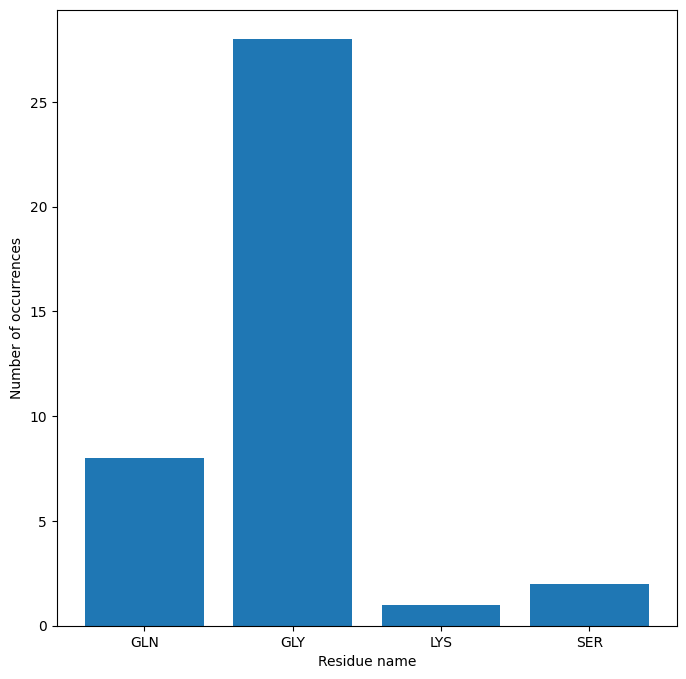

In [43]:
residue_types = np.array([i[0] for i in noise_array])
unique_residue_types, counts = np.unique(residue_types, return_counts=True)

plt.ylabel("Number of occurrences")
plt.xlabel("Residue name")
plt.bar(unique_residue_types, counts)


Estimated number of clusters: 2
Estimated number of noise points: 128


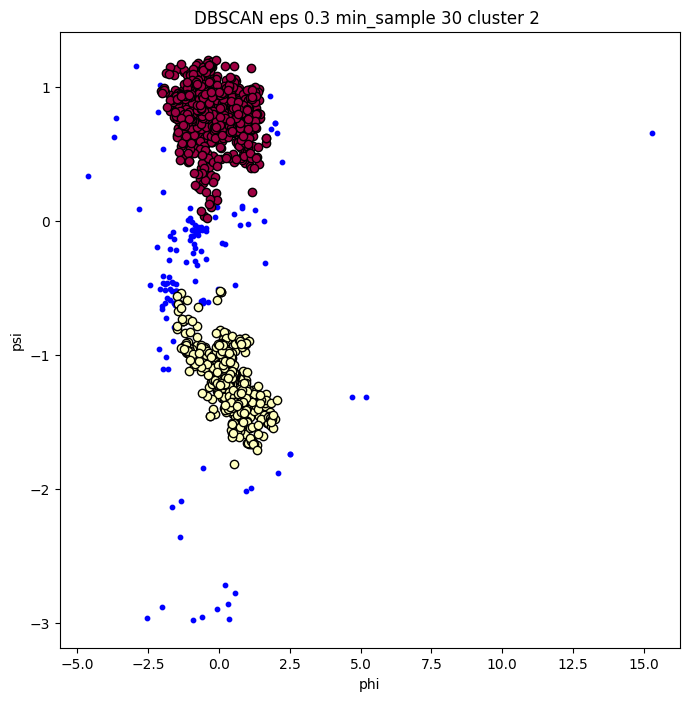

<Figure size 3000x3000 with 0 Axes>

In [36]:
#Filter only PRO residue
df_pro = df[df['residue name'] == 'PRO']
X = df_pro.loc[:, ['phi', 'psi']].values.reshape(-1,2)
X = StandardScaler().fit_transform(X)
eps=0.3
min_samples = 30

#Perform DBSCAN
plt.scatter(X[:, 0], X[:, 1], s=10, c='blue')
db = DBSCAN(eps = eps, min_samples=min_samples).fit(X)
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
 

unique_labels = set(labels)
####
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors): 
    if k == -1:
        continue
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
    markeredgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
    markeredgecolor='k')

plt.title('DBSCAN eps {} min_sample {} cluster {} '.format(eps, min_samples, n_clusters_))
plt.xlabel('phi')
plt.ylabel('psi')
plt.figure().set_size_inches(30, 30, forward=True)
plt.show()

In [40]:
print(df_pro)

      residue name  position chain        phi         psi  cluster
1              PRO        11     A -44.283210  136.002076        0
17             PRO        27     A -49.944645  -25.888991        1
68             PRO        79     A -76.452014   97.745207        0
110            PRO       121     A -53.054020  -27.254912        1
123            PRO       134     A -66.751364   94.099782        0
...            ...       ...   ...        ...         ...      ...
29284          PRO       288     B -54.565923  -42.141418        1
29339          PRO       349     B -66.803083  136.260650        0
29340          PRO       350     B -59.612140  160.048387        0
29347          PRO       357     B -48.679835  135.208297        0
29356          PRO       366     B -61.621274  -41.694960        1

[1596 rows x 6 columns]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7385ba88-ea66-4a3f-877e-e99e6aa04b2e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>